In [2]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt


tweets_data_path = 'data/dilmahash.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print len(tweets_data)

358293


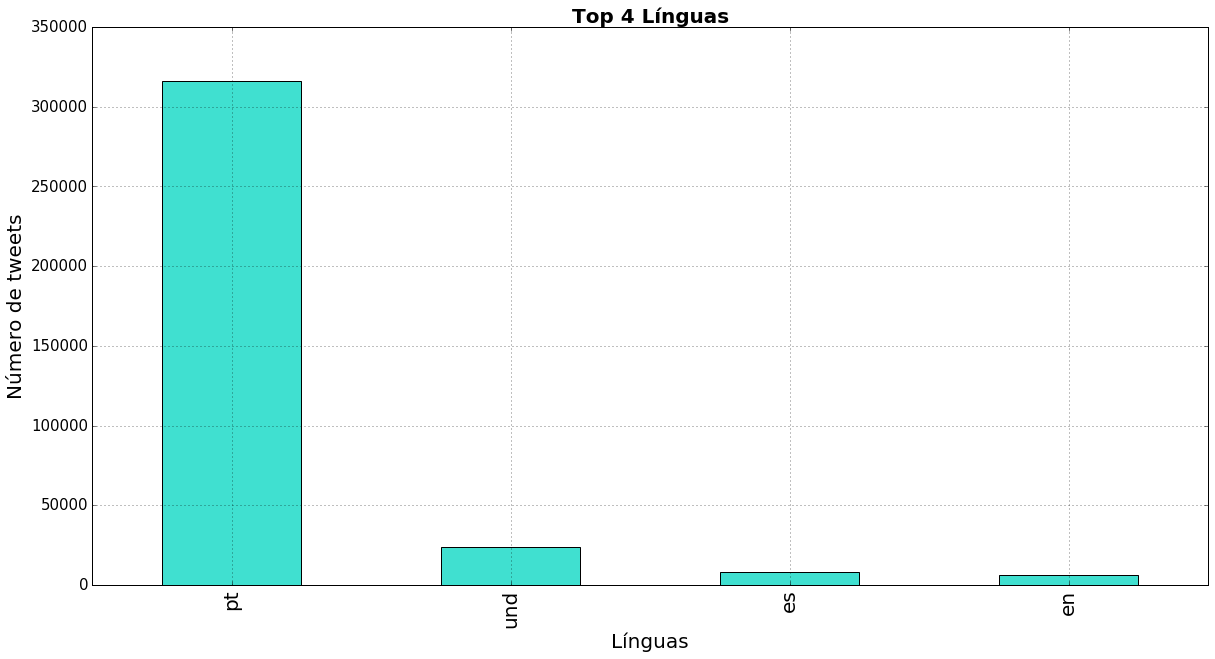

In [35]:
tweets = pd.DataFrame()

tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country']
                        if tweet['place'] != None else None, tweets_data)

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Línguas'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 4 Línguas'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='springre')
plt.grid()


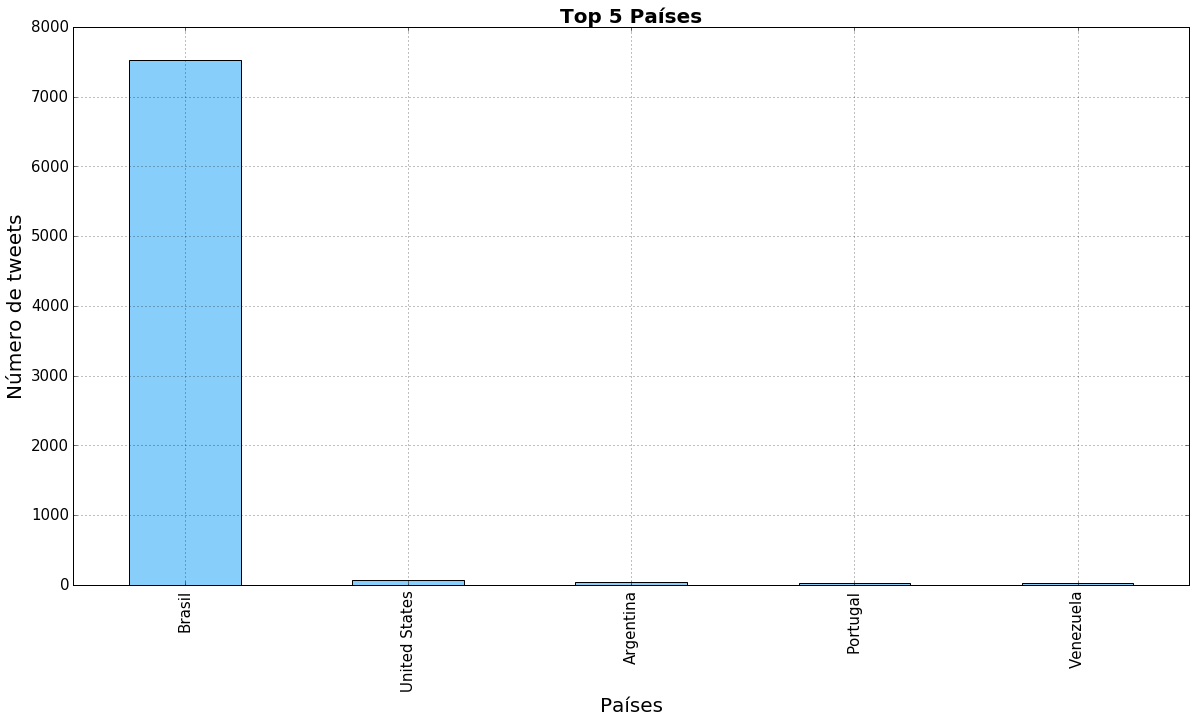

In [5]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Países'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 Países'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='lightskyblue')
plt.grid()

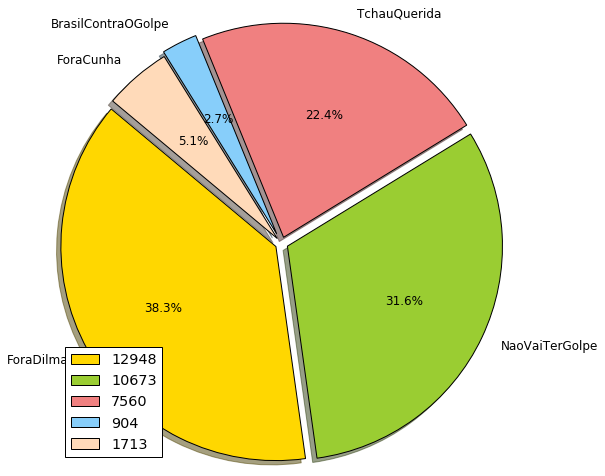

In [33]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['NaoVaiTerGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('NaoVaiTerGolpe', tweet))
tweets['TchauQuerida'] = tweets['text'].apply(lambda tweet: word_in_text('TchauQuerida', tweet))
tweets['ForaDilma'] = tweets['text'].apply(lambda tweet: word_in_text('ForaDilma', tweet))
tweets['BrasilContraOGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('BrasilContraOGolpe', tweet))
tweets['ForaCunha'] = tweets['text'].apply(lambda tweet: word_in_text('ForaCunha', tweet))

# print tweets['FicaQuerida'].value_counts()[True]
# print tweets['NaoVaiTerGolpe'].value_counts()[True]
# print tweets['ForaPT'].value_counts()[True]

hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida', 'BrasilContraOGolpe', 'ForaCunha']
tweets_by_hashtags = [tweets['ForaDilma'].value_counts()[True],
                      tweets['NaoVaiTerGolpe'].value_counts()[True],
                      tweets['TchauQuerida'].value_counts()[True],
                      tweets['BrasilContraOGolpe'].value_counts()[True],
                      tweets['ForaCunha'].value_counts()[True]]

plt.subplots(figsize=(8,8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'peachpuff']
explode = (0.03, 0.03, 0.03, 0.05, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc="best")
plt.axis('equal')
plt.show()

In [42]:
tweets['nao'] = tweets['text'].apply(lambda tweet: word_in_text('nao', tweet))
tweets['sim'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet))

tweets['ImpeachmentDay'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet) 
                                          or word_in_text('nao', tweet))

# print tweets['nao'].value_counts()[True]
# print tweets['sim'].value_counts()[True]
# print tweets['ImpeachmentDay'].value_counts()[True]

# print tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True]
# print tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]
# print tweets[tweets['ImpeachmentDay'] == True]['TchauQuerida'].value_counts()[True]
# print tweets[tweets['ImpeachmentDay'] == True]['ForaCunha'].value_counts()[True]

tweets_by_hashtags = [tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True], 
                      tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True], 
                      tweets[tweets['ImpeachmentDay'] == True]['TchauQuerida'].value_counts()[True],
                      tweets[tweets['ImpeachmentDay'] == True]['ForaCunha'].value_counts()[True]]

x_pos = list(range(len(hashtags)))
width = 0.8
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x_pos, tweets_by_hashtags, width, alpha=1, color='sienna')
ax.set_ylabel('Número de tweets'.decode('utf-8'), fontsize=15)
ax.set_title('Ranking: ForaDilma vs. NaoVaiTerGolpe vs. TchauQuerida vs. ForaCunha (Relevância #ImpeachmentDay)'.decode('utf-8'),
             fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(hashtags)
plt.grid()

IndentationError: unexpected indent (<ipython-input-42-ee7c06c59b7e>, line 17)

In [23]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets_relevant = tweets[tweets['ImpeachmentDay'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['TchauQuerida'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaDilma'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaCunha'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['NaoVaiTerGolpe'] == True]['link']

1139      https://t.co/l2v3cS44GT
2797      https://t.co/t57HIgTQss
4680      https://t.co/IliUBXWBAL
8871      https://t.co/rtOavI9uQP
8906      https://t.co/VswJPAt5ul
9619      https://t.co/IiXU4ICRrH
9685      https://t.co/tlt3wTQ969
29394     https://t.co/X5sQDCFrZn
44789     https://t.co/d30IxMKNqB
45275     https://t.co/d30IxMKNqB
60574     https://t.co/WfVuj0DAry
62115     https://t.co/vUErUGgdOt
62948     https://t.co/5mqsWBDIHh
63335     https://t.co/Kck2W7uc9B
87916     https://t.co/LZMCqgWsou
93018     https://t.co/vJv6YHn31R
101356    https://t.co/6hOBQnYHhW
101573    https://t.co/nmY20txeMW
102084    https://t.co/9H9LU1CebE
102695    https://t.co/FdpW6olPVF
103954    https://t.co/brnPZh3Ruc
104091    https://t.co/h9SUq42jJp
105028    https://t.co/KQd41ZTwYW
105442    https://t.co/qZszc7jYNy
105724    https://t.co/I8Wv0IBzpe
106003    https://t.co/5HcF1xPBDj
106857    https://t.co/EbjVWtmvuc
108539    https://t.co/HzZNyYsqb4
116954    https://t.co/Xw8EDpB6Vp
117108    http